In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Stable Coin 제거

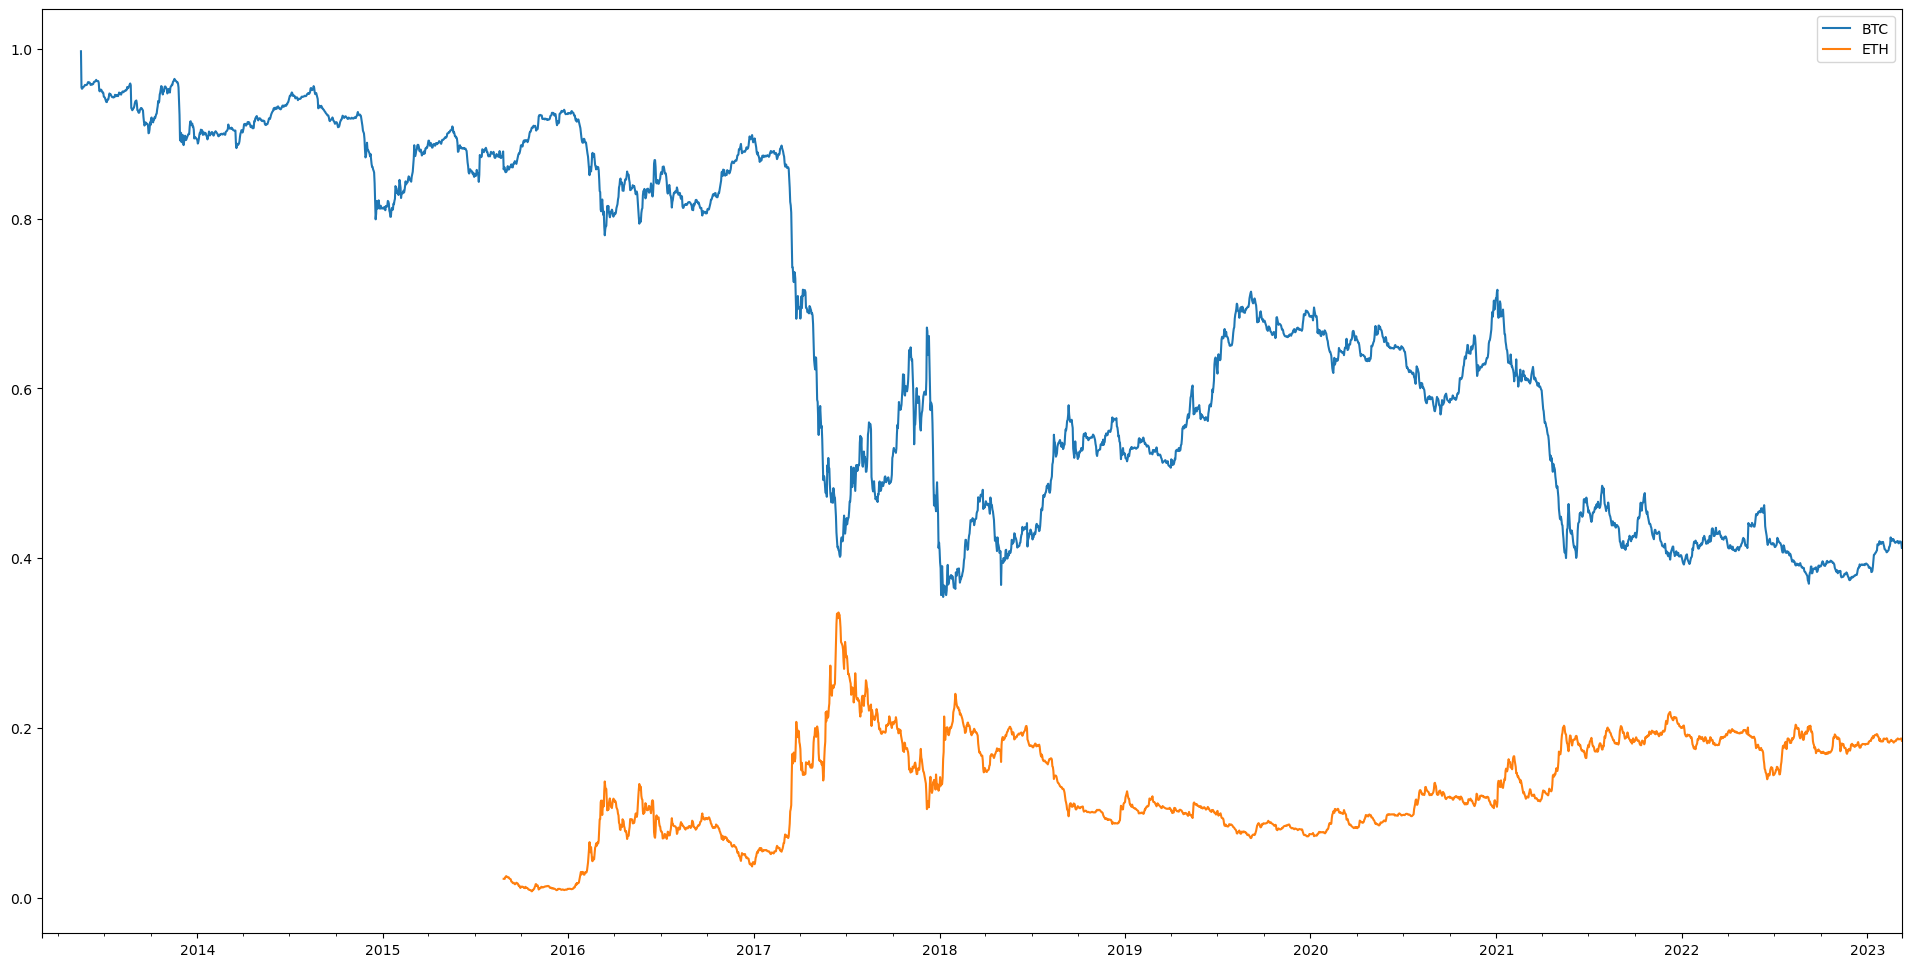

In [3]:
mktcap_screened = pd.read_pickle("jehyeon_cleaning_mktcap.pickle")
price_screened = pd.read_pickle("jehyeon_cleaning_price.pickle")

pct_screened = price_screened.pct_change()

# 시총 weight 데이터프레임 생성
mktcap_weight = mktcap_screened.apply(lambda x: x / np.nansum(x), axis=1)

mktcap_weight.loc[:,["BTC","ETH"]].plot(figsize=(24,12));

In [4]:
stable_coin = ["USDT","USDC","BUSD","DAI","TUSD","FRAX",
               "USDP","USDD","GUSD","FEI","USDJ","LUSD",
               "USTC","EURS","TRIBE","vUSDC","USDX",
               "vBUSD","XSGD","VAI","SUSD","CUSD","SBD",
               "vUSDT","EUROC","OUSD","USDK","RSV","KRT",
               "GYEN","CEUR","HUSD","BIDR","IDRT","vDAI",
               "DGD","BITCNY","XCHF","DGX","EOSDT","BITUSD",
               "ZUSD","ESD","USDS","BAC","ALUSD","YUSD",
               "USX","MIM","DOLA","MIMATIC","EURT","MUSD",
               "USDs","AGEUR","mCUSD","TOR","TRYB","mCEUR",
               "XIDR","1GOLD","USDS","MXNT","XSTUSD","USDEX",
               "CUSD","MTR","BRCP","CUSDT","SEUR","xDAI",
               "DUSD","USDP","USDH","USDZ","DJED","JPYC",
               "PAR","WANUSDT","ONC","FUSD","MUSD","ONEICHI",
               "FUSD","CADC","XUSD","DSD","JPYC","USDB","XUSD",
               "MONEY","USDR","COFFIN","IRON","KBC","DPT","nUSD",
               "STATIK","USN","USNBT","BITGOLD","BITEUR","HGT",
               "QC","ITL","CONST","USDQ","XEUR","BGBP","EBASE",
               "BKRW","USDEX","USDL","UETH","BVND","BSD","SAC",
               "USDEX","ZUSD","USDFL","MDS","MDO","FLOAT","fUSDT",
               "FLUSD","ARTH","USDAP","BEAN","COUSD","DUSD","AUSD",
               "fUSDT","H2O","IUSDS","USDI","GBPT","EUROS"]

len(stable_coin)

137

In [5]:
symbol = mktcap_weight.columns.to_list()

in_symbol = [stable for stable in stable_coin if stable in symbol]

# 우리 데이터 프레임에도 있는 코인은 여기에 들어가게 됨
print(len(in_symbol))

76


In [6]:
# 스테이블코인 을 드랍하자
mkt = mktcap_screened.drop(in_symbol, axis=1)
price = price_screened.drop(in_symbol, axis=1)

mkt.to_pickle("jehyeon_cleaning_mktcap.pickle")
price.to_pickle("jehyeon_cleaning_price.pickle")